In [50]:
import pandas as pd

df_cluster = pd.read_csv('./temp_clutster.csv')

In [51]:
df_cp1 = df_cluster.copy()
df_cp2 = df_cluster.copy()
df_cp3 = df_cluster.copy()

df_cp1.drop(columns='TRAVEL_ID', inplace=True)
df_cp2.drop(columns='TRAVEL_ID', inplace=True)
df_cp3.drop(columns='TRAVEL_ID', inplace=True)

In [52]:
df_cluster.head()

,TRAVEL_ID,AGE_GRP,TRAVEL_COMPANIONS_NUM,TRAVEL_STATUS_ACCOMPANY,SLEEP,ACTIVITY,RESULT_MVMN,Cluster
0,e_e004720,60,1,2인 가족 여행,0,쇼핑 / 구매,버스,7
1,e_e000914,20,0,나홀로 여행,0,쇼핑 / 구매,기차,5
2,e_e003564,30,3,자녀 동반 여행,0,체험 활동 / 입장 및 관람,자가용,6
3,e_e000396,30,1,2인 가족 여행,1,휴식,자가용,0
4,e_e001890,20,1,2인 여행(가족 외),0,단순 구경 / 산책 / 걷기,버스,5


In [53]:
df_cluster.drop(columns='TRAVEL_ID', inplace=True)

In [54]:
df_cluster = pd.get_dummies(df_cluster)

In [55]:
df_cluster = df_cluster.astype('int64')

In [56]:
df_cluster.head()

,AGE_GRP,TRAVEL_COMPANIONS_NUM,SLEEP,Cluster,TRAVEL_STATUS_ACCOMPANY_2인 가족 여행,TRAVEL_STATUS_ACCOMPANY_2인 여행(가족 외),TRAVEL_STATUS_ACCOMPANY_3대 동반 여행(친척 포함),TRAVEL_STATUS_ACCOMPANY_3인 이상 가족 여행(친척 포함),TRAVEL_STATUS_ACCOMPANY_3인 이상 여행(가족 외),TRAVEL_STATUS_ACCOMPANY_나홀로 여행,...,RESULT_MVMN_기차,RESULT_MVMN_기타,RESULT_MVMN_도보,RESULT_MVMN_렌터카,RESULT_MVMN_배/선박,RESULT_MVMN_버스,RESULT_MVMN_자가용,RESULT_MVMN_지하철,RESULT_MVMN_택시,RESULT_MVMN_항공기
0,60,1,0,7,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,20,0,0,5,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,30,3,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,30,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,20,1,0,5,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [57]:
from sklearn.preprocessing import StandardScaler

numeric_features = ['AGE_GRP', 'TRAVEL_COMPANIONS_NUM', 'SLEEP']
if all(col in df_cluster.columns for col in numeric_features):
    scaler = StandardScaler()
    df_cluster[numeric_features] = scaler.fit_transform(df_cluster[numeric_features])

In [58]:
df_cluster.head()

,AGE_GRP,TRAVEL_COMPANIONS_NUM,SLEEP,Cluster,TRAVEL_STATUS_ACCOMPANY_2인 가족 여행,TRAVEL_STATUS_ACCOMPANY_2인 여행(가족 외),TRAVEL_STATUS_ACCOMPANY_3대 동반 여행(친척 포함),TRAVEL_STATUS_ACCOMPANY_3인 이상 가족 여행(친척 포함),TRAVEL_STATUS_ACCOMPANY_3인 이상 여행(가족 외),TRAVEL_STATUS_ACCOMPANY_나홀로 여행,...,RESULT_MVMN_기차,RESULT_MVMN_기타,RESULT_MVMN_도보,RESULT_MVMN_렌터카,RESULT_MVMN_배/선박,RESULT_MVMN_버스,RESULT_MVMN_자가용,RESULT_MVMN_지하철,RESULT_MVMN_택시,RESULT_MVMN_항공기
0,2.492629,-0.330419,-0.843093,7,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,-1.039253,-1.013921,-0.843093,5,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,-0.156283,1.036586,-0.843093,6,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,-0.156283,-0.330419,0.152033,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,-1.039253,-0.330419,-0.843093,5,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


c:\Users\carra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


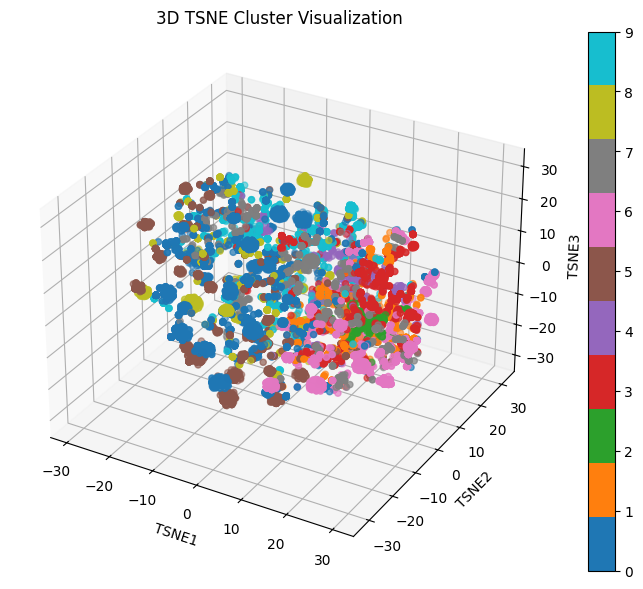

In [33]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# TSNE 모델 최적화
tsne = TSNE(
    n_components=3,                # 3D 차원 축소
    random_state=42,               # 재현성을 위한 랜덤 시드
    perplexity=30,                 # perplexity 값 최적화 (일반적으로 5-50)
    learning_rate=200,             # learning_rate (최적화 성능에 영향을 미침)
    n_iter=1000,                   # 반복 횟수 (더 많은 반복으로 결과 안정성 확보)
    n_iter_without_progress=300,   # 최적화가 멈춘 후 반복 횟수
    early_exaggeration=12,         # 초기에 군집을 더 확실하게 분리하도록 조정
    metric='euclidean'             # 거리 계산 방법 (기본값: 유클리드 거리)
)

# TSNE로 3D 차원 축소 적용
tsne_result = tsne.fit_transform(df_cluster.drop('Cluster', axis=1))  # 'Cluster' 컬럼 제외하고 적용

# TSNE 결과를 데이터프레임에 저장
df_tsne = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2', 'TSNE3'])
df_tsne['Cluster'] = df_cluster['Cluster']  # 군집화 결과 추가

# 3D 시각화
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 각 군집에 대해 다른 색상을 지정하여 시각화
scatter = ax.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'], df_tsne['TSNE3'], c=df_tsne['Cluster'], cmap='tab10')

# 컬러바 추가
fig.colorbar(scatter)

# 축 레이블 추가
ax.set_xlabel('TSNE1')
ax.set_ylabel('TSNE2')
ax.set_zlabel('TSNE3')

# 타이틀 추가
ax.set_title('3D TSNE Cluster Visualization')

# 시각화 출력
plt.show()


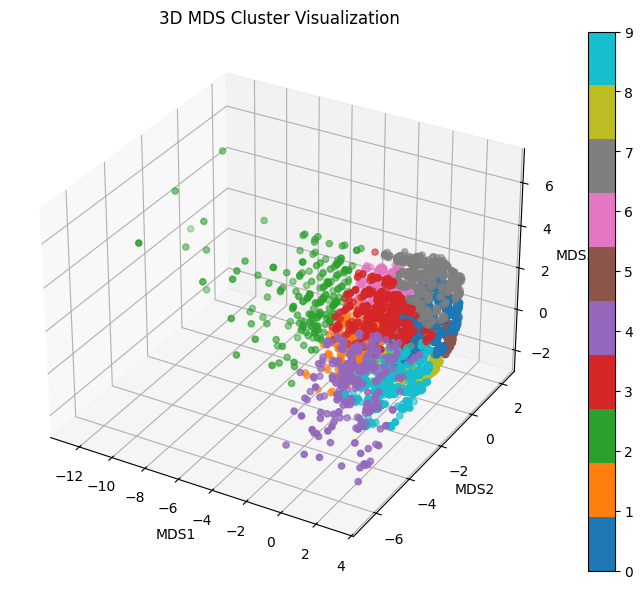

In [59]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 군집화 결과가 df['Cluster']에 있다고 가정
# MDS로 3차원 차원 축소

mds = MDS(n_components=3, random_state=42)
mds_result = mds.fit_transform(df_cluster.drop('Cluster', axis=1))  # 'Cluster' 컬럼을 제외하고

# MDS 결과를 DataFrame으로 변환
df_mds = pd.DataFrame(mds_result, columns=['MDS1', 'MDS2', 'MDS3'])
df_mds['Cluster'] = df_cluster['Cluster']  # 군집화 결과를 추가

# 3D 시각화
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 각 군집에 대해 다른 색상으로 시각화
scatter = ax.scatter(df_mds['MDS1'], df_mds['MDS2'], df_mds['MDS3'], c=df_mds['Cluster'], cmap='tab10')

# 축 레이블 추가
ax.set_xlabel('MDS1')
ax.set_ylabel('MDS2')
ax.set_zlabel('MDS3')

# 타이틀 추가
ax.set_title('3D MDS Cluster Visualization')

# 컬러바 추가
fig.colorbar(scatter)

plt.show()
